# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# **Unzip Dataset**

In [2]:
!unzip -q '/content/gdrive/MyDrive/Image_Classification/images.zip'

# **Importing the dependencies**

In [3]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**Print the categories of  images in trained and validation folders**

In [4]:
file_names = os.listdir('/content/images/train')
print(file_names)

['fractured', 'not fractured']


In [5]:
file_names = os.listdir('/content/images/val')
print(file_names)

['fractured', 'not fractured']


# **Maintain Image DATASET**

**Display Original Image**

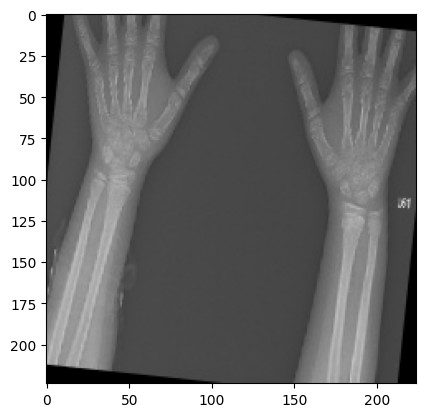

In [6]:
img = cv2.imread('/content/images/train/fractured/10-rotated1.jpg')
imgplt = plt.imshow(img)
plt.show()

In [7]:
img.shape

(224, 224, 3)

**Remove Noise and Display Resize Image**

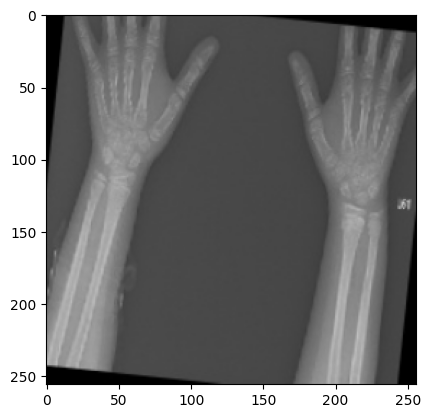

In [8]:
img = cv2.imread('/content/images/train/fractured/10-rotated1.jpg')
img_resize = cv2.resize(img,(256,256))
imgplt = plt.imshow(img_resize)
plt.show()

In [9]:
img_resize.shape

(256, 256, 3)

**Show the total images in trained and validation folder**

In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/images/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/images/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


# **Normalize Data**

In [11]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Train a CNN model**

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
277/277 [==============================] - 45s 109ms/step - loss: 1.5943 - accuracy: 0.6384 - val_loss: 2.6719 - val_accuracy: 0.3750
Epoch 2/5
277/277 [==============================] - 28s 99ms/step - loss: 0.5566 - accuracy: 0.7167 - val_loss: 1.5117 - val_accuracy: 0.5267
Epoch 3/5
277/277 [==============================] - 27s 98ms/step - loss: 0.3924 - accuracy: 0.8089 - val_loss: 1.4111 - val_accuracy: 0.5283
Epoch 4/5
277/277 [==============================] - 27s 98ms/step - loss: 0.3408 - accuracy: 0.8482 - val_loss: 0.7501 - val_accuracy: 0.6333
Epoch 5/5
277/277 [==============================] - 27s 98ms/step - loss: 0.2782 - accuracy: 0.8789 - val_loss: 0.8894 - val_accuracy: 0.6683


# **Predict Results**

**For training dataset**

1/1 [==============================] - 0s 21ms/step
This  X-ray represents a fracture  image


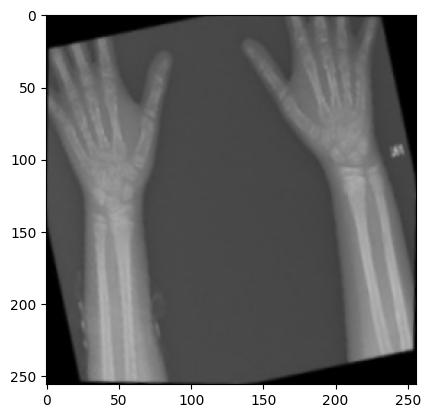

In [25]:
test_img = cv2.imread('/content/images/train/fractured/10-rotated2-rotated1-rotated2.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)
model.predict(test_input)
# "0" represent fracture image and "1" represent not fracture image

if model.predict(test_input)== 0:
  print('This  X-ray represents a fracture  image')

else:
  print('This X-ray represents a non-fracture image ')


1/1 [==============================] - 0s 32ms/step
This X-ray represents a non-fracture image 


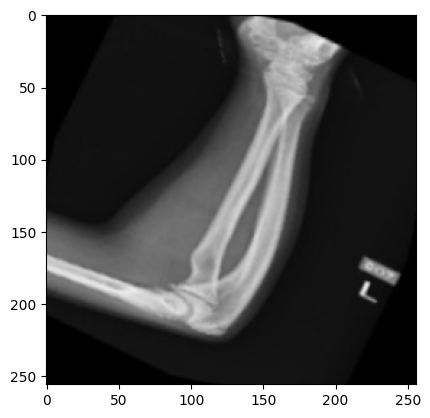

In [35]:
test_img = cv2.imread('/content/images/train/not fractured/10-rotated1-rotated3-rotated1.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

plt.imshow(test_img)

model.predict(test_input)
if model.predict(test_input)== 0:
  print('This  X-ray represents a fracture  image')

else:
  print('This X-ray represents a non-fracture image ')


**For testing dataset**

1/1 [==============================] - 0s 83ms/step
This  X-ray represents a fracture  image


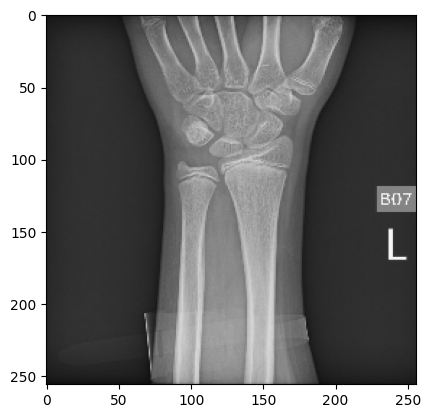

In [34]:

test_img = cv2.imread('/content/images/val/not fractured/2.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

plt.imshow(test_img)
model.predict(test_input)
if model.predict(test_input)== 0:
  print('This  X-ray represents a fracture  image')

else:
  print('This X-ray represents a non-fracture image ')